## Objective : Create a Time Series model to forcast Electric Production

### Domain Analysis

The dataset provided belongs to the domain of energy and utilities, specifically focusing on electricity production by utilities over time. Here’s a detailed overview of this domain:

1. Importance of Electricity Production
Electricity is a critical resource, powering industries, households, transportation, and technology.
Monitoring electricity production provides insights into:
Economic activity: Higher electricity production often correlates with industrial and economic growth.
Energy policy and planning: Helps ensure energy security and manage supply-demand balance.
Environmental impact: Guides the transition to renewable energy sources and reduction of carbon emissions.

2. Key Features of the Sector
Seasonality: Electricity production typically shows seasonal patterns. For instance:
Winter: Increased demand for heating.
Summer: Higher demand for cooling.
Economic Cycles: Production often reflects economic trends like booms or recessions, where industrial activity rises or falls.
Technological Impact: The adoption of renewable energy sources (solar, wind) has transformed the sector, impacting traditional utility-based production.

3. Relevant Stakeholders
Governments and Regulators: Use data to set energy policies, ensure grid reliability, and meet emissions targets.
Energy Companies: Plan production levels, pricing, and infrastructure investment.
Economists: Analyze the correlation between electricity production and broader economic indicators like GDP.
Environmental Organizations: Track the shift from fossil fuels to sustainable energy sources.

4. Potential Applications of the Data
Energy Forecasting: Predict future electricity production to manage grid operations efficiently.
Capacity Planning: Determine whether current production can meet future demand.
Policy Analysis: Assess how regulatory changes (e.g., renewable energy incentives) affect production trends.
Market Analysis: Help energy market participants, like traders or investors, make informed decisions.

5. Challenges in the Domain
Fluctuations in Demand: Electricity production must constantly match demand, which varies based on time, weather, and economic activity.
Transition to Renewables: Balancing traditional energy sources with intermittent renewable sources like wind and solar.
Environmental Concerns: Reducing greenhouse gas emissions while maintaining reliable production.


### Data Understanding

Date : This feature represents the time at which the production data was recorded. In your dataset, it seems to follow a monthly format (MM-DD-YYYY), indicating the data is collected at monthly intervals.

IPG2211A2N : This feature measures the electricity and gas production index by utility companies, as part of the Industrial Production Index (IPI).
IPG: Industrial Production for a specific sector.
2211A2N: Code identifying the specific sector, here representing Electric and Gas Utilities.


In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
## Loading the data
data=pd.read_csv('Electric Production_Time Series.csv')

### Basic checks

In [6]:
data.head()

,DATE,IPG2211A2N
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [7]:
data.tail()

,DATE,IPG2211A2N
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212
396,01-01-2018,129.4048


In [8]:
data.info()   #info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [9]:
# Month is actually given as string here. It must be in date-time format

In [10]:
## parse_dates: parsing the date (Converts the string representation of a date to Date object) 
# index_col: using date column as index

data=pd.read_csv('Electric Production_Time Series.csv',parse_dates=[0],index_col='DATE')

## Explorarory Data Analysis

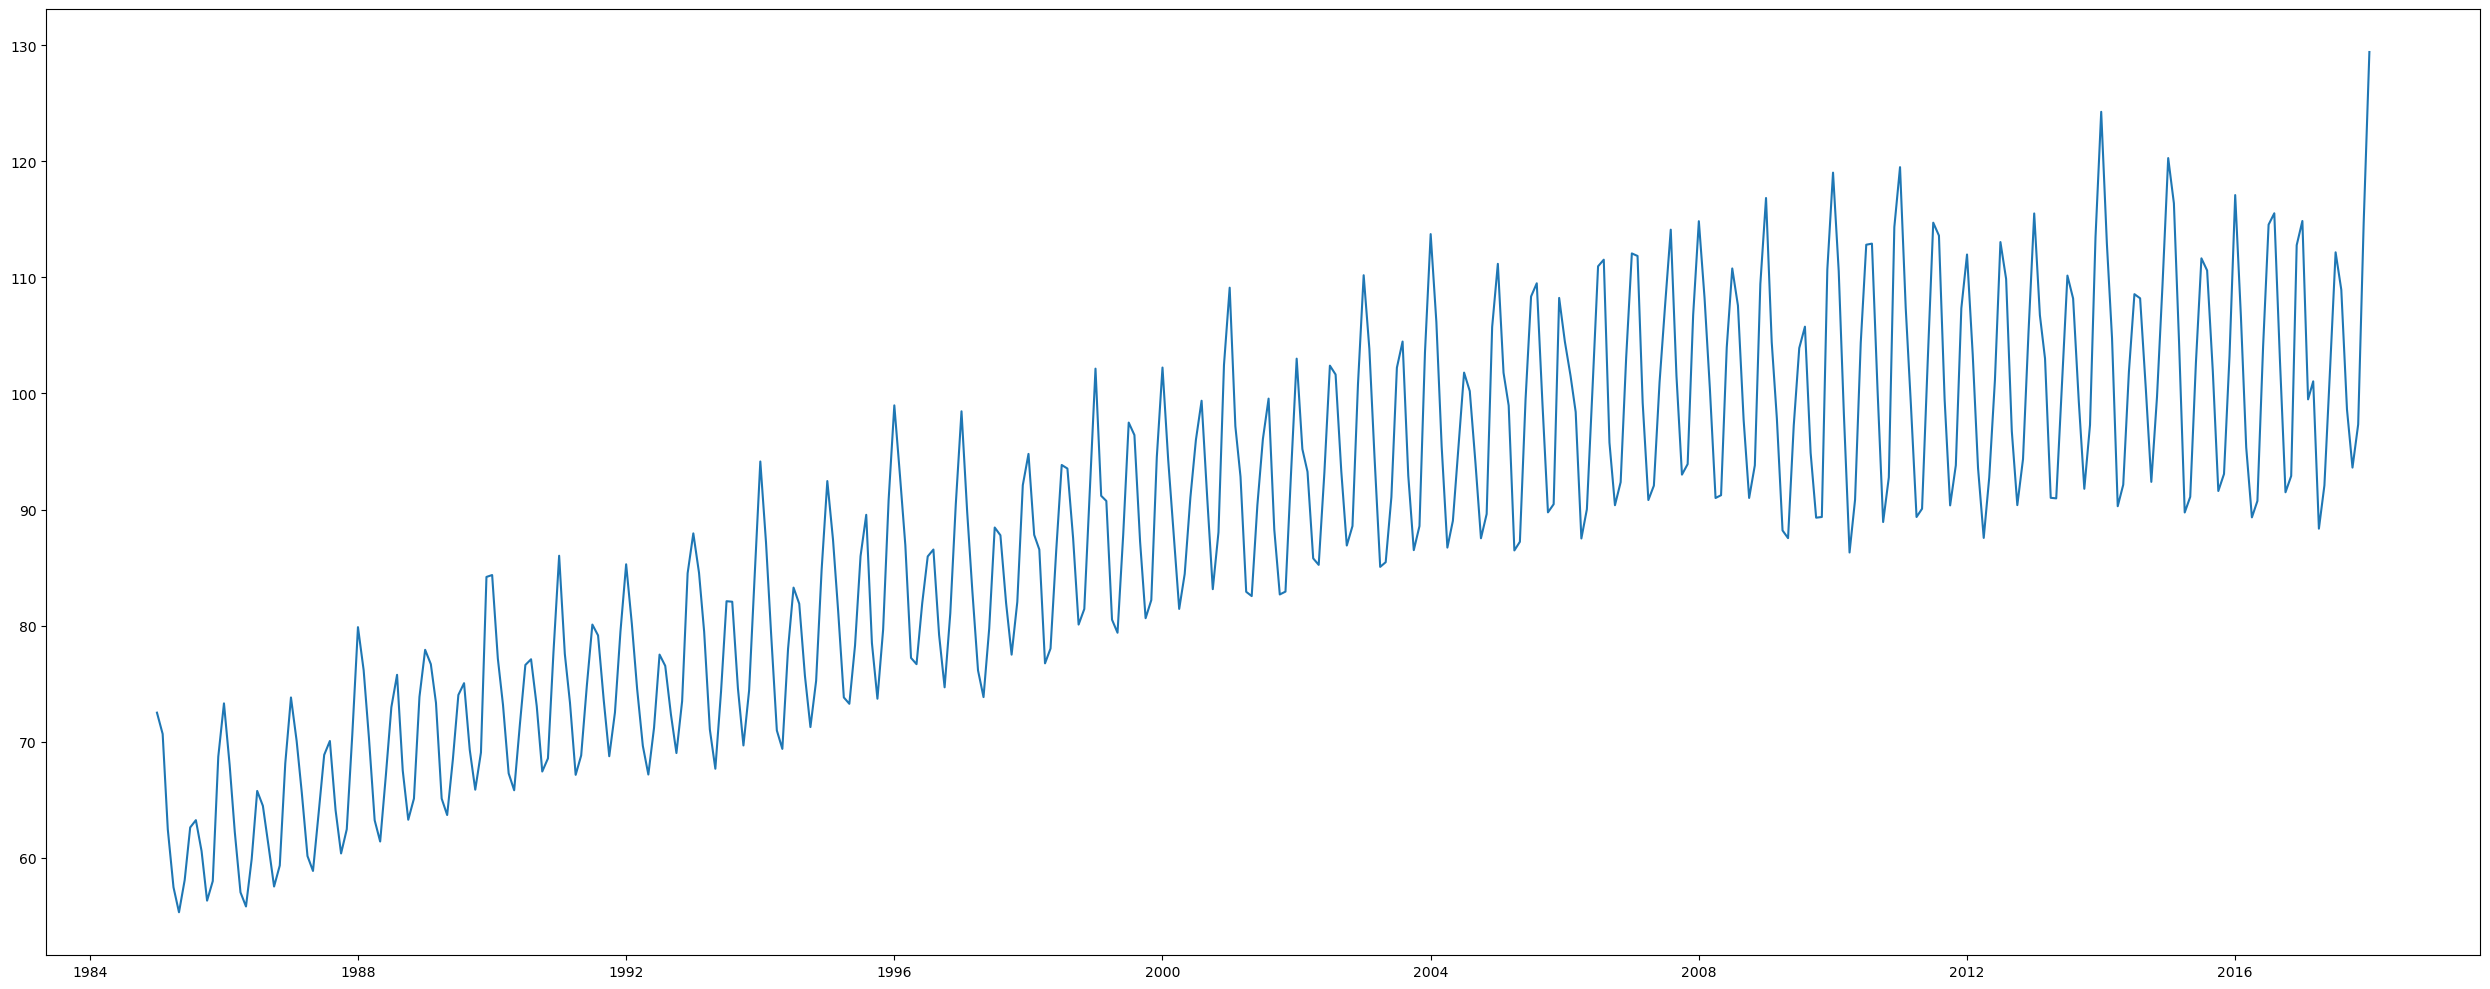

In [173]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10),facecolor='white')#canvas  size
plt.plot(data)#line plot 
plt.tight_layout()

In [13]:
## from plot we can see the series given is not stationary

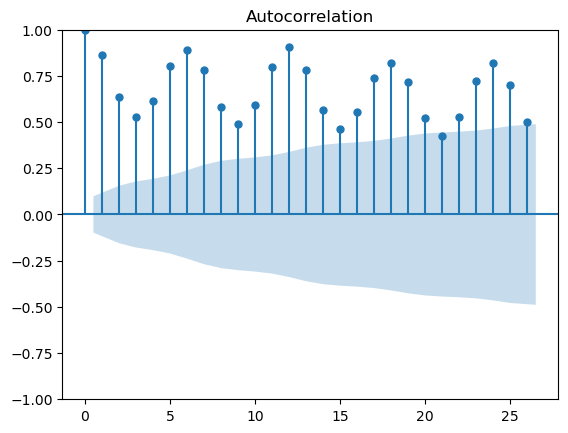

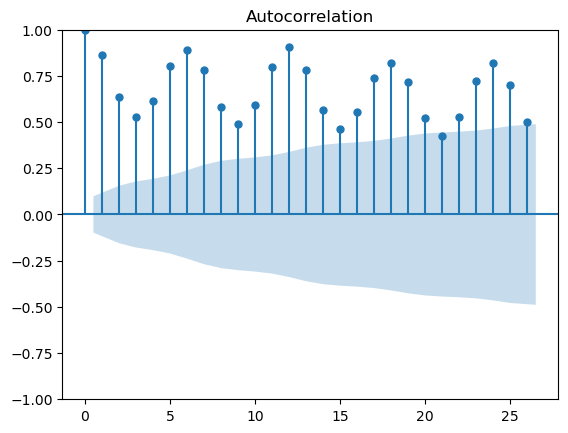

In [14]:
## Plotting the autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

In [15]:
# From the autocorrelation plot, it is clear that given series is not stationary.

We can perform the ADfuller test, a test based on hypothesis, where if the p-value is less than 0.05, then we can consider the time series is stationary, and if the P-value is  greater than 0.05, then the time series is non-stationary.

In [17]:
# ADfuller Test to check stationarity 

In [18]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.IPG2211A2N,autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)


1. ADF :  -2.2569903500472432
2. P-Value :  0.18621469116586814
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 381
5. Critical Values :
	 1% :  -3.4476305904172904
	 5% :  -2.869155980820355
	 10% :  -2.570827146203181


P-value is higher for our dataset, and we can say that the evidence of rejecting the null hypothesis is low; hence the time series is non-stationary. 

In [20]:
## making it stationary by taking difference of 1
data1=data.diff(periods=1) #This means calculating the change in your row(s)/column(s) over a set number of periods. Or simply, 
#pandas diff will subtract 1 cell value from another cell value within the same index.

In [21]:
data1  # Series integrated to the order of 1 

,IPG2211A2N
DATE,
1985-01-01,NaN
1985-02-01,-1.8332
1985-03-01,-8.2218
1985-04-01,-4.9788
1985-05-01,-2.1563
...,...
2017-09-01,-10.3158
2017-10-01,-5.0017
2017-11-01,3.7222


In [22]:
data1 = data1.iloc[1:]  # Null value discarded
data1

,IPG2211A2N
DATE,
1985-02-01,-1.8332
1985-03-01,-8.2218
1985-04-01,-4.9788
1985-05-01,-2.1563
1985-06-01,2.7753
...,...
2017-09-01,-10.3158
2017-10-01,-5.0017
2017-11-01,3.7222


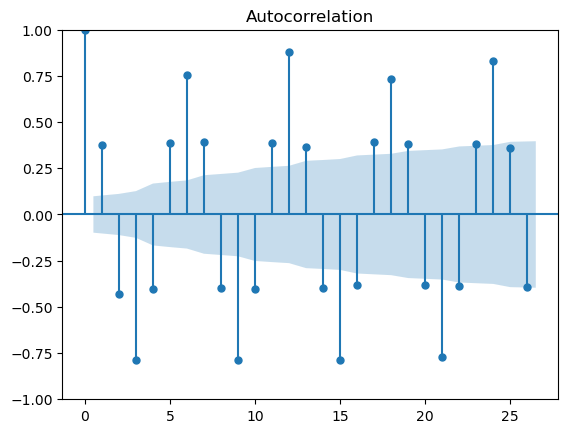

In [23]:
plot_acf(data1);  #autocorrelation plot

In [70]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data1.IPG2211A2N,autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)


1. ADF :  -7.10489088226736
2. P-Value :  4.0777865655383114e-10
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 381
5. Critical Values :
	 1% :  -3.4476305904172904
	 5% :  -2.869155980820355
	 10% :  -2.570827146203181


P-value is lower for our dataset, and we can say that the evidence of rejecting the null hypothesis is high; hence the time series is stationary. 

In [85]:
data1.shape

(396, 1)

In [87]:
# Creating training and test sets
train=data1[:200]  #training data
test=data1[200:]   #testing data

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200 entries, 1985-02-01 to 2001-09-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  200 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


In [77]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [91]:
## Applying autoregressive model

from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')


In [93]:
#ar_select_order : gives the best lags ordered as an array

# to select the optimal values for lags
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(data1,maxlag=15,glob=True)
mod.ar_lags


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15]

In [95]:
# model creation
ar_model = AutoReg(train,lags=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15])   ## object creation with lags specified
ar_model_fit = ar_model.fit()  #training the model

In [97]:
# making prediction
prediction = ar_model_fit.predict(start=200,end=396)

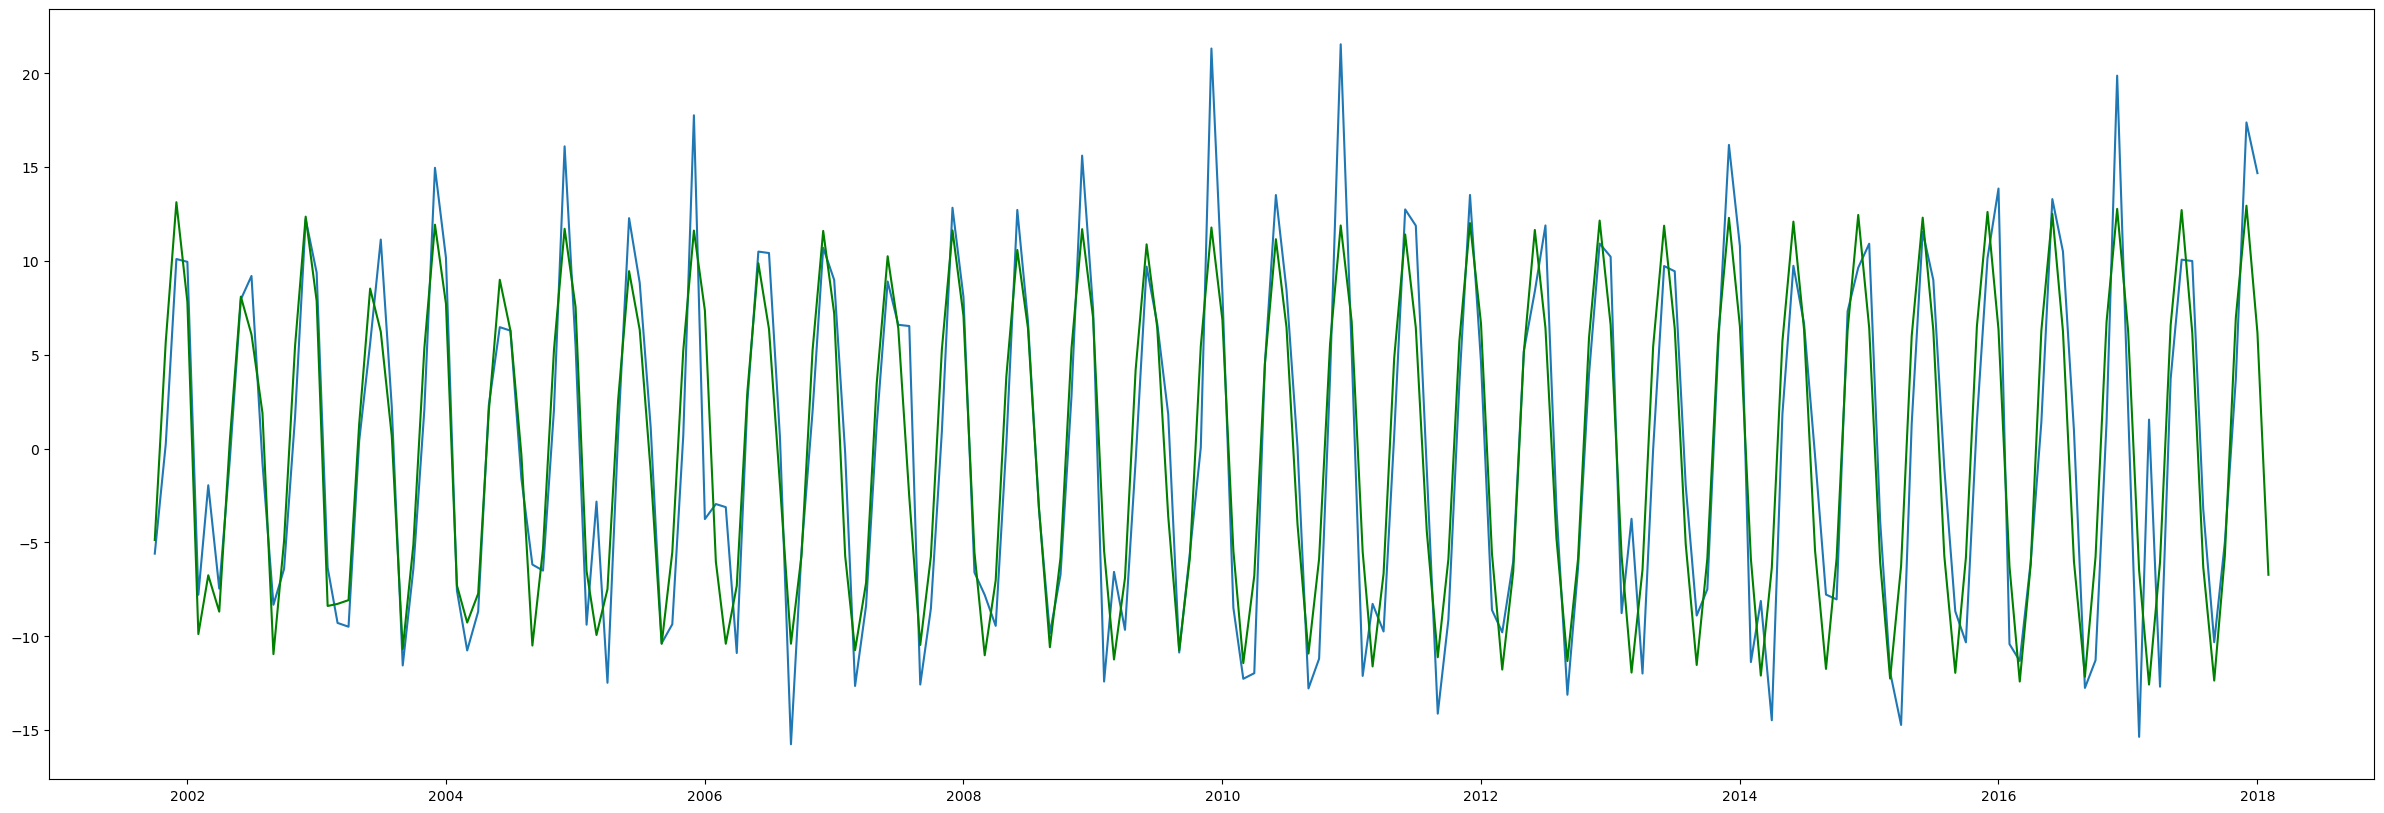

In [165]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10),facecolor='white')
plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

### ARIMA Model

In [113]:
## importing the library
from statsmodels.tsa.arima.model import ARIMA

In [117]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))#order= p,d,q

model_arima_fit = model_arima.fit()#training

In [119]:
## evaluate the model
print(model_arima_fit.aic)

1337.0097450010305


In [121]:
## predicting the output of sample points
predictions = model_arima_fit.forecast(steps=9)

In [123]:
predictions

2001-10-01   -13.270031
2001-11-01   -13.540543
2001-12-01   -13.577174
2002-01-01   -13.582135
2002-02-01   -13.582807
2002-03-01   -13.582898
2002-04-01   -13.582910
2002-05-01   -13.582912
2002-06-01   -13.582912
Freq: MS, Name: predicted_mean, dtype: float64

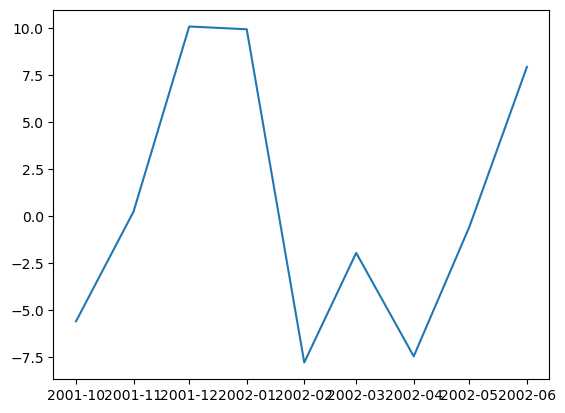

In [125]:
plt.plot(test[:9])

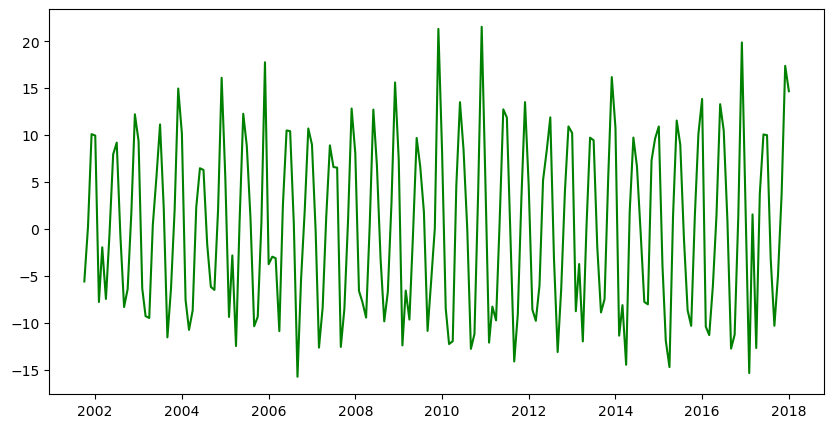

In [163]:
## plotting the ARIMA forecast values using random pdq
plt.figure(figsize=(10,5),facecolor='white')
plt.plot(test,color='green')

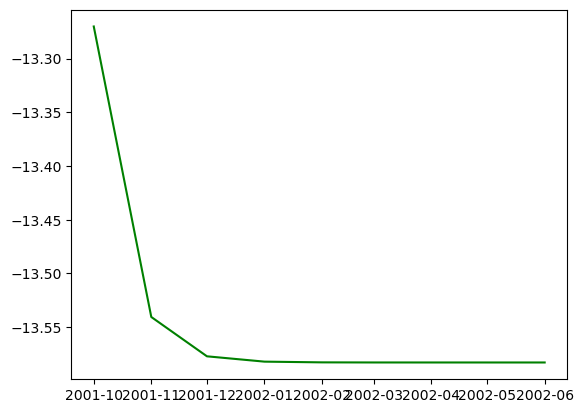

In [131]:
## plotting the ARIMA forecast values using random pdq
plt.plot(predictions,color='green')

In [133]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)#values of p,d,q range from 0 to 4

pdq = list(itertools.product(p,d,q))
# is used to find the cartesian product from the given iterator, output is lexicographic ordered.
pdq #number of combinaton of pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [135]:
##The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
list1=[]
list2=[]
for params in pdq: #iterating params over pdq
    try:
        model_arima = ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)#printing parameter and aic values
        list1.append(params)
        list2.append(model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 1302.3442335783648
(0, 0, 1) 1244.0137042792949
(0, 0, 2) 1193.1924824453238
(0, 0, 3) 1151.8403889874564
(0, 0, 4) 1146.750261928124
(0, 1, 0) 1338.6091210187237
(0, 1, 1) 1333.6935540512945
(0, 1, 2) 1243.2268204162538
(0, 1, 3) 1239.1955261639023
(0, 1, 4) 1160.4879663751922
(0, 2, 0) 1438.92178518827
(0, 2, 1) 1340.1773221322524
(0, 2, 2) 1334.8852594514522
(0, 2, 3) 1249.8362824811052
(0, 2, 4) 1245.159871091011
(0, 3, 0) 1607.0411009387265
(0, 3, 1) 1439.947605796388
(0, 3, 2) 1347.0750185137558
(0, 3, 3) 1341.2844261876498
(0, 3, 4) 1261.1499125761984
(0, 4, 0) 1819.302197439289
(0, 4, 1) 1607.1570980517622
(0, 4, 2) 1445.9734456441063
(0, 4, 3) 1358.8349117784196
(0, 4, 4) 1352.3550649443423
(1, 0, 0) 1274.7622352925846
(1, 0, 1) 1245.4612400475035
(1, 0, 2) 1177.568976777645
(1, 0, 3) 1153.3119453352092
(1, 0, 4) 1146.848424034501
(1, 1, 0) 1337.0097450010305
(1, 1, 1) 1334.6377722127509
(1, 1, 2) 1244.5630068429166
(1, 1, 3) 1239.740206041388
(1, 1, 4) 1161.51790227

In [137]:
min(list2)  # lowest aic score

988.6678107548342

In [139]:
# pdq corresponding to lowest aic
loc=list2.index(min(list2))
list1[loc]

(4, 0, 4)

In [141]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(4, 0, 4))

model_arima_fit = model_arima.fit() #training

In [143]:
print(model_arima_fit.aic) # confirm aic score

988.6678107548342


In [145]:
forecast = model_arima_fit.forecast(steps=9)
forecast 

2001-10-01   -5.418933
2001-11-01    2.354930
2001-12-01    9.394506
2002-01-01    7.447036
2002-02-01   -1.053484
2002-03-01   -8.489280
2002-04-01   -6.774605
2002-05-01    1.585690
2002-06-01    8.913314
Freq: MS, Name: predicted_mean, dtype: float64

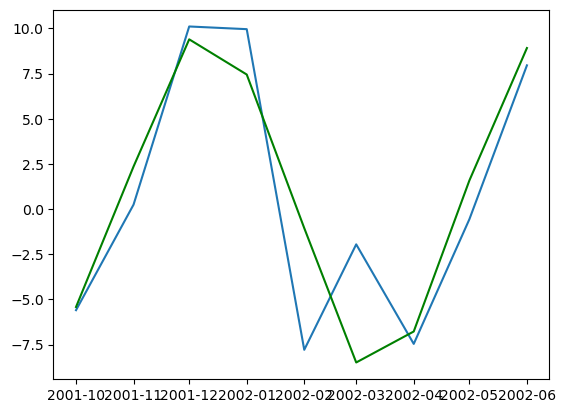

In [147]:
# Comparision of actual vs predicted for 9 values
plt.plot(test[:9])
plt.plot(forecast,color='green')#line plot for prediction

In [151]:
forecast25 = model_arima_fit.forecast(steps=25)
test1 = test[0:25].values.flatten()
test1

array([ -5.595 ,   0.2459,  10.1062,   9.9574,  -7.788 ,  -1.9519,
        -7.4606,  -0.5599,   7.9545,   9.2034,  -0.7637,  -8.3204,
        -6.4087,   1.6747,  12.2254,   9.3804,  -6.3394,  -9.2881,
        -9.4912,   0.4033,   5.6108,  11.1439,   2.2482, -11.5547,
        -6.4088])

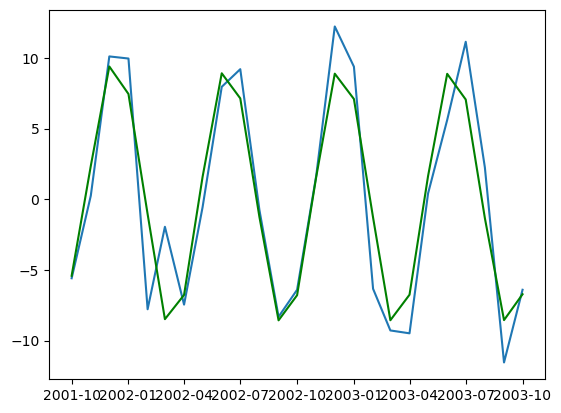

In [153]:
# Comparision of actual vs predicted for 25 values
plt.plot(test[:25])
plt.plot(forecast25,color='green') #line plot for prediction

In [155]:
# Accuracy metrics
import numpy as np
def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)        # MSE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
 
    return({'mse':mse, 'mae': mae, 'rmse':rmse})

forecast_accuracy(forecast25, test1)

{'mse': 8.428259858202802,
 'mae': 2.2178518092328408,
 'rmse': 2.903146544389863}

In [157]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test1, forecast25))
  
# Calculate mean squared error
mean_squared_error(test1, forecast25)

2.903146544389863


8.428259858202802